In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
plt.rcParams['figure.figsize'] = [20, 10]


In [5]:
photos = pd.read_csv('yelp_photo.csv')
checkins = pd.read_csv('yelp_checkin.csv')
tips = pd.read_csv('yelp_tip.csv')
reviews = pd.read_csv('yelp_review.csv')
users = pd.read_csv('yelp_user.csv')
data = pd.read_csv('yelp_data.csv')

In [6]:
print(data.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state', 'alcohol?',
       'has_bike_parking', 'takes_credit_cards', 'good_for_kids',
       'price_range', 'take_reservations', 'has_wifi', 'pic_count'],
      dtype='object')


In [ ]:
data.pic_count.unique()

<AxesSubplot:>

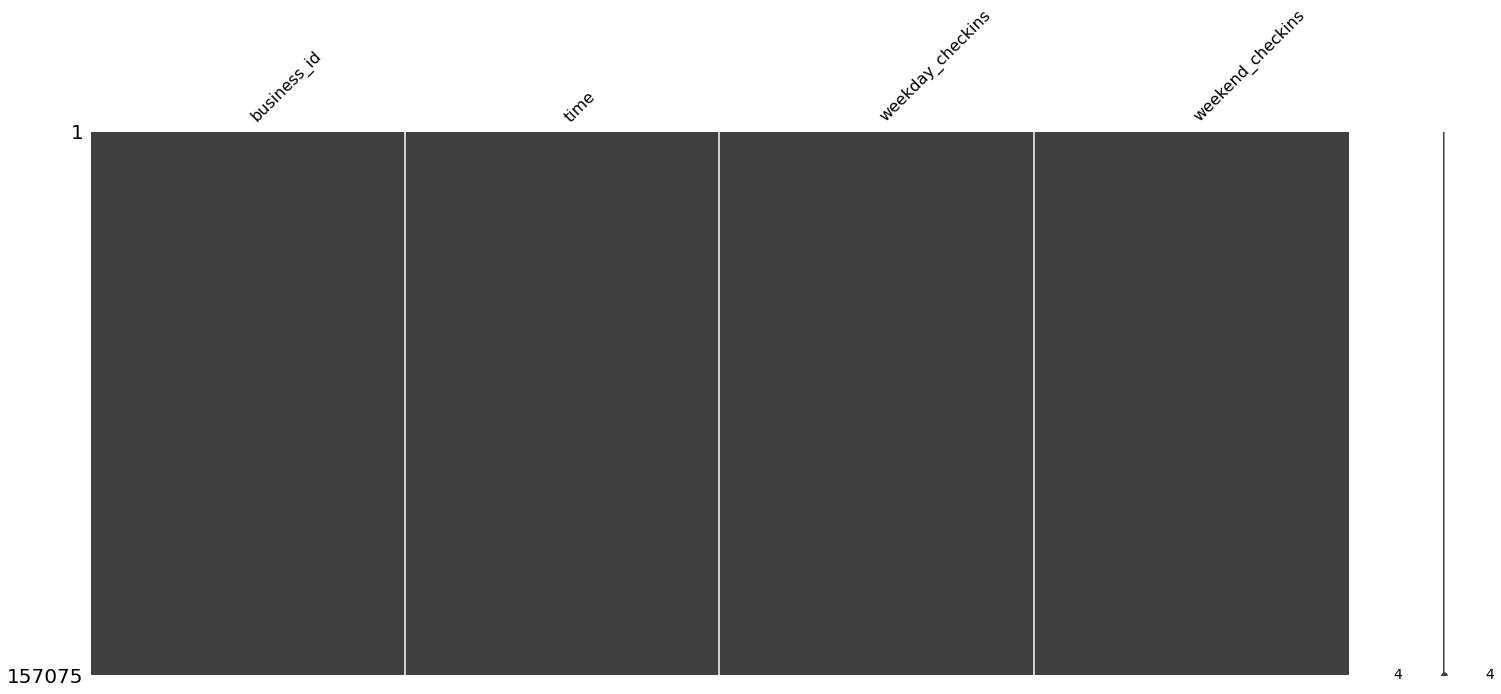

In [7]:
msno.matrix(checkins)

<AxesSubplot:>

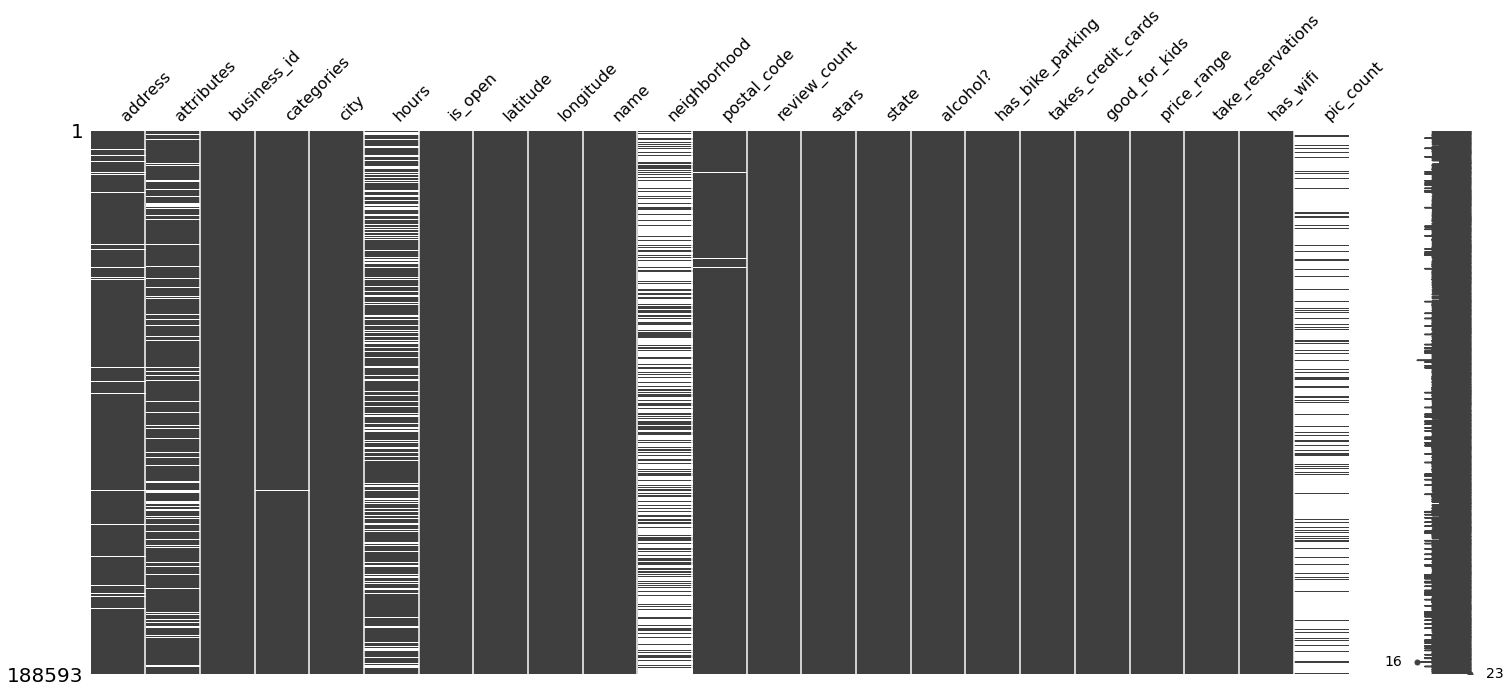

In [8]:
msno.matrix(data)

<AxesSubplot:>

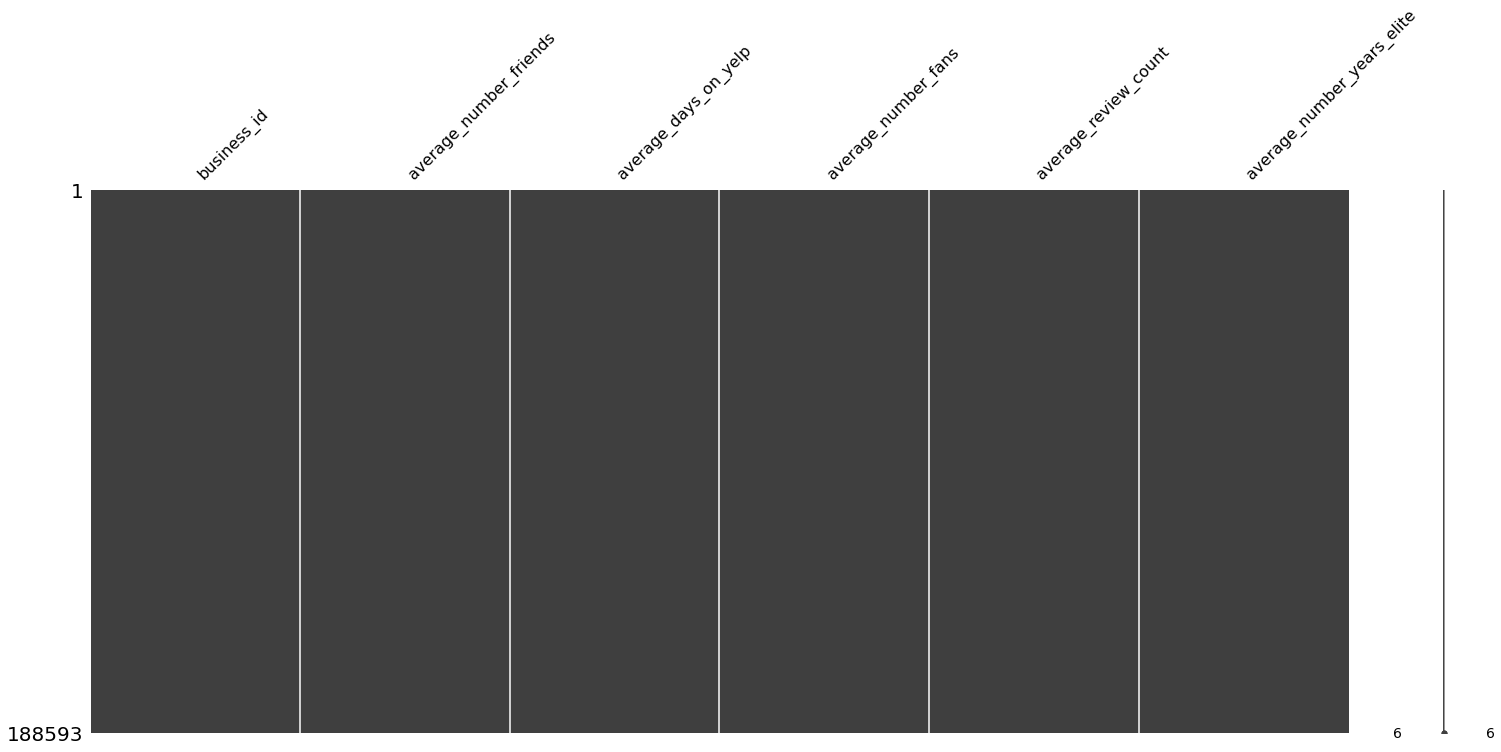

In [9]:
msno.matrix(users)

<AxesSubplot:>

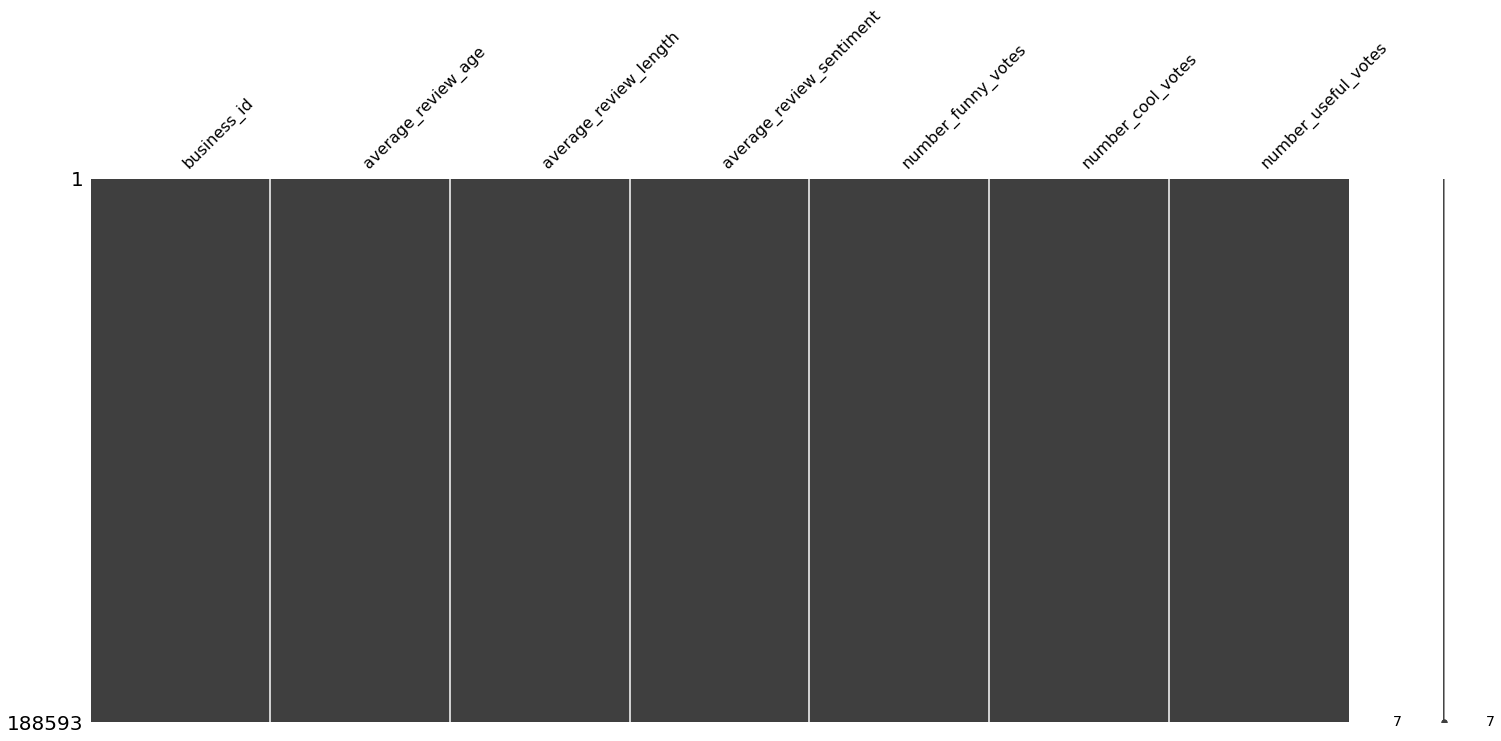

In [10]:
msno.matrix(reviews)

<AxesSubplot:>

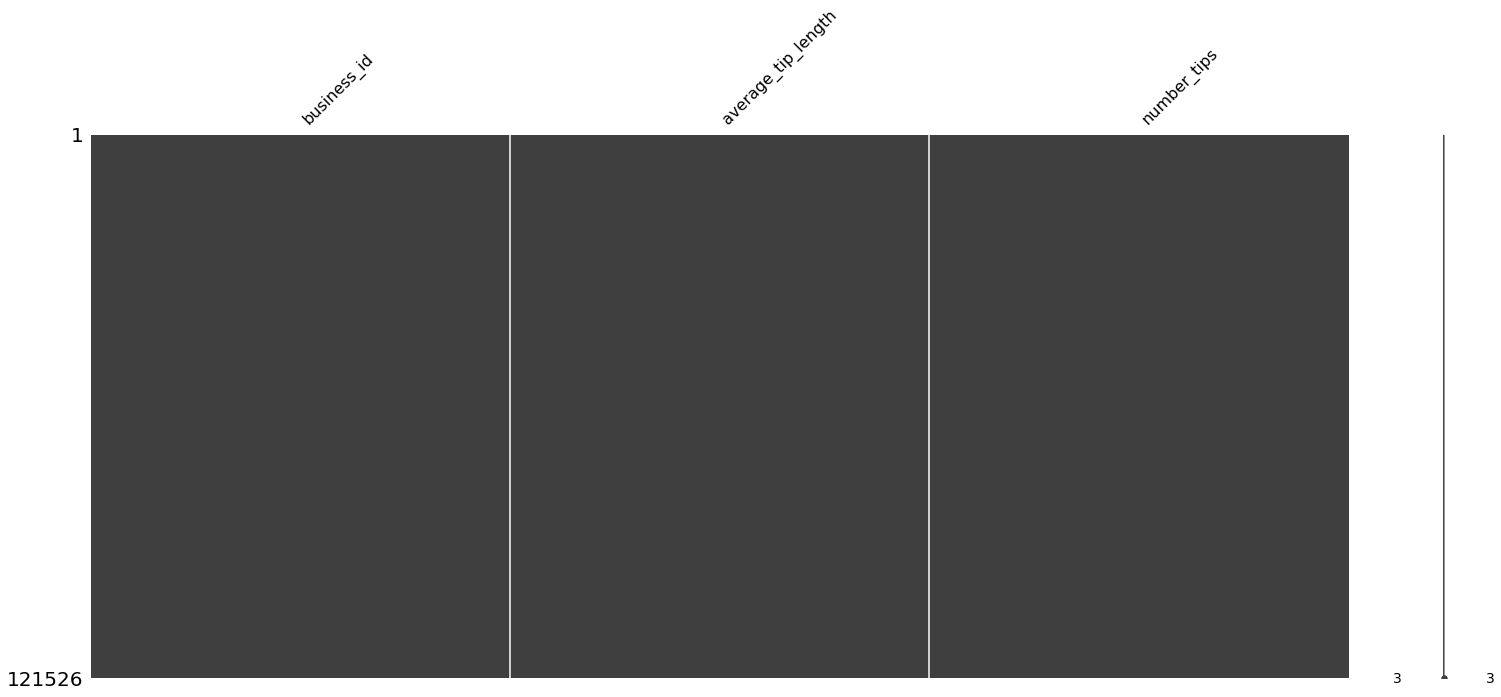

In [11]:
msno.matrix(tips)

In [7]:
#[checkins,photos,reviews,tips,users]
for i in [checkins,photos,reviews,tips,users]:
    data = pd.merge(data, i, how='left', on='business_id')

<AxesSubplot:>

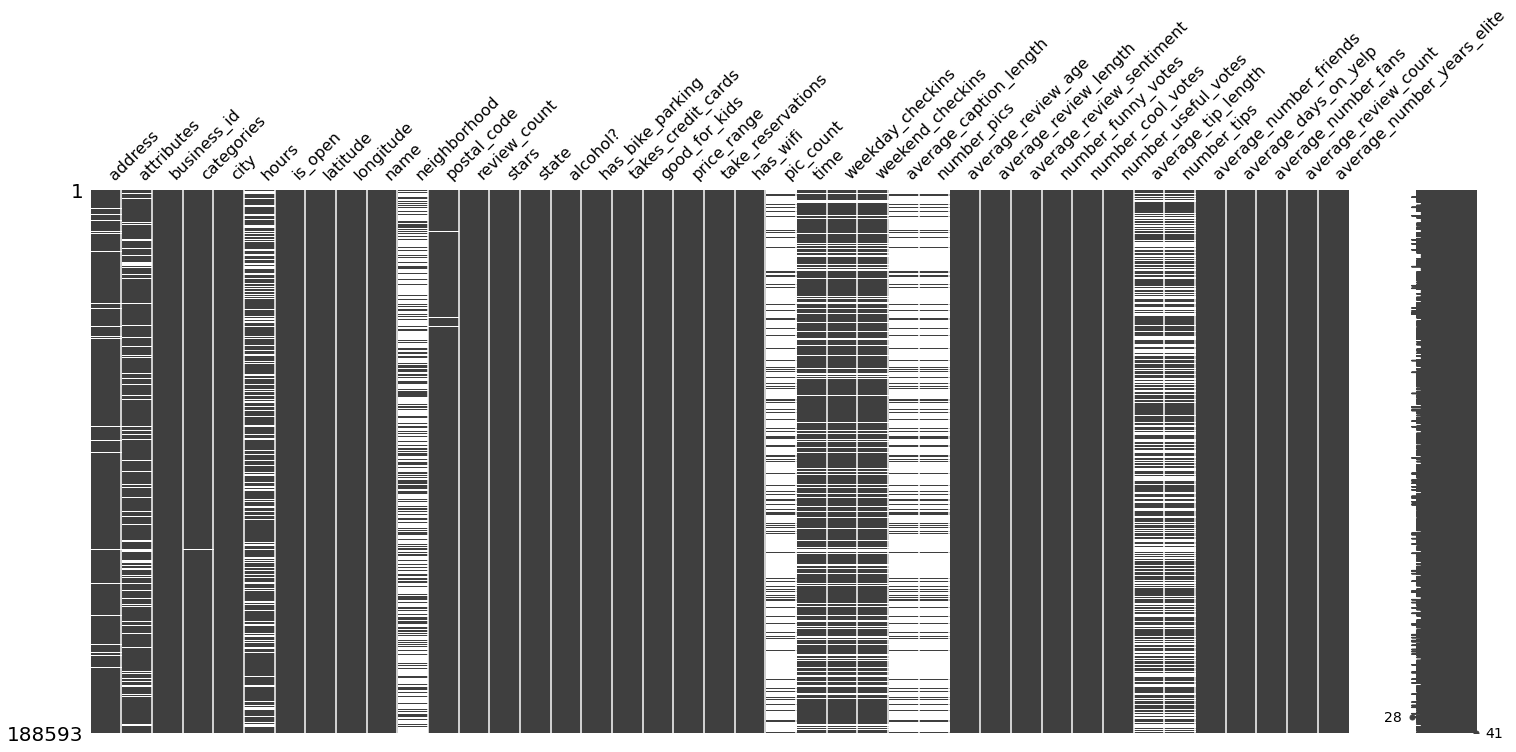

In [8]:
msno.matrix(data)

In [ ]:
data.shape

In [26]:
pd.options.display.max_columns = 41
pd.options.display.max_colwidth = 100

In [28]:
data.tail(1)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,alcohol?,has_bike_parking,takes_credit_cards,good_for_kids,price_range,take_reservations,has_wifi,pic_count,time,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_tip_length,number_tips,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
188592,"3900 Paradise Rd, Ste R","{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': Fal...",NkOvIueadjFUxeCyq_uQEw,"Makeup Artists, Men's Clothing, Swimwear, Shopping, Hair Salons, Fashion, Hair Stylists, Beauty ...",Las Vegas,"{'Tuesday': '11:0-19:0', 'Wednesday': '11:0-19:0', 'Thursday': '11:0-19:0', 'Friday': '11:0-19:0...",1,36.118697,-115.154269,Tito Jimy Salon and Boutique,Eastside,89169,8,4.0,NV,0,1,1,1,2,0,0,NaN,"{'Tue-3': 1, 'Fri-15': 1, 'Mon-15': 1, 'Tue-15': 1, 'Mon-16': 1, 'Tue-16': 1, 'Tue-19': 1, 'Mon-...",11.0,3.0,NaN,NaN,1511.25,568.5,0.537462,4,2,7,179.0,2.0,19.0,2030.25,0.625,10.0,0.0


In [29]:
features_to_remove = ["address", "attributes","business_id","categories","city","hours","latitude",
                      "longitude","name","neighborhood","postal_code","state","time","number_pics",
                     "average_caption_length",]
data.drop(features_to_remove, axis=1, inplace=True)

<AxesSubplot:>

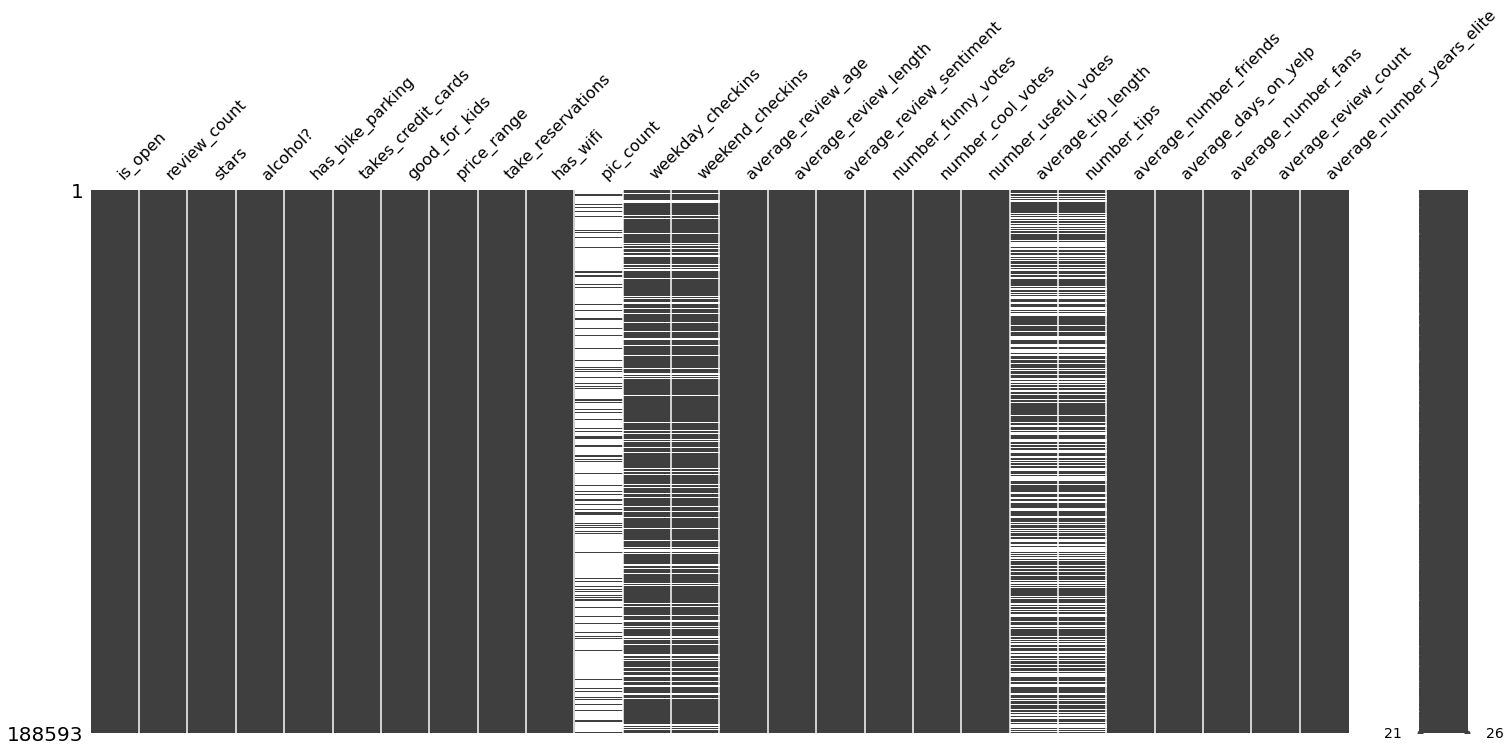

In [30]:
msno.matrix(data)

In [31]:
data.shape

(188593, 26)

In [32]:
#removing weekday_checkins weekend_checkins average_tip_length number_tips
# we can handle them late
data.drop(["weekday_checkins", "weekend_checkins", "average_tip_length", "number_tips"], axis=1, inplace=True)


In [35]:
data.fillna({"pic_count":0},inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   is_open                     188593 non-null  int64  
 1   review_count                188593 non-null  int64  
 2   stars                       188593 non-null  float64
 3   alcohol?                    188593 non-null  int64  
 4   has_bike_parking            188593 non-null  int64  
 5   takes_credit_cards          188593 non-null  int64  
 6   good_for_kids               188593 non-null  int64  
 7   price_range                 188593 non-null  int64  
 8   take_reservations           188593 non-null  int64  
 9   has_wifi                    188593 non-null  int64  
 10  pic_count                   188593 non-null  float64
 11  average_review_age          188593 non-null  float64
 12  average_review_length       188593 non-null  float64
 13  average_review

<AxesSubplot:>

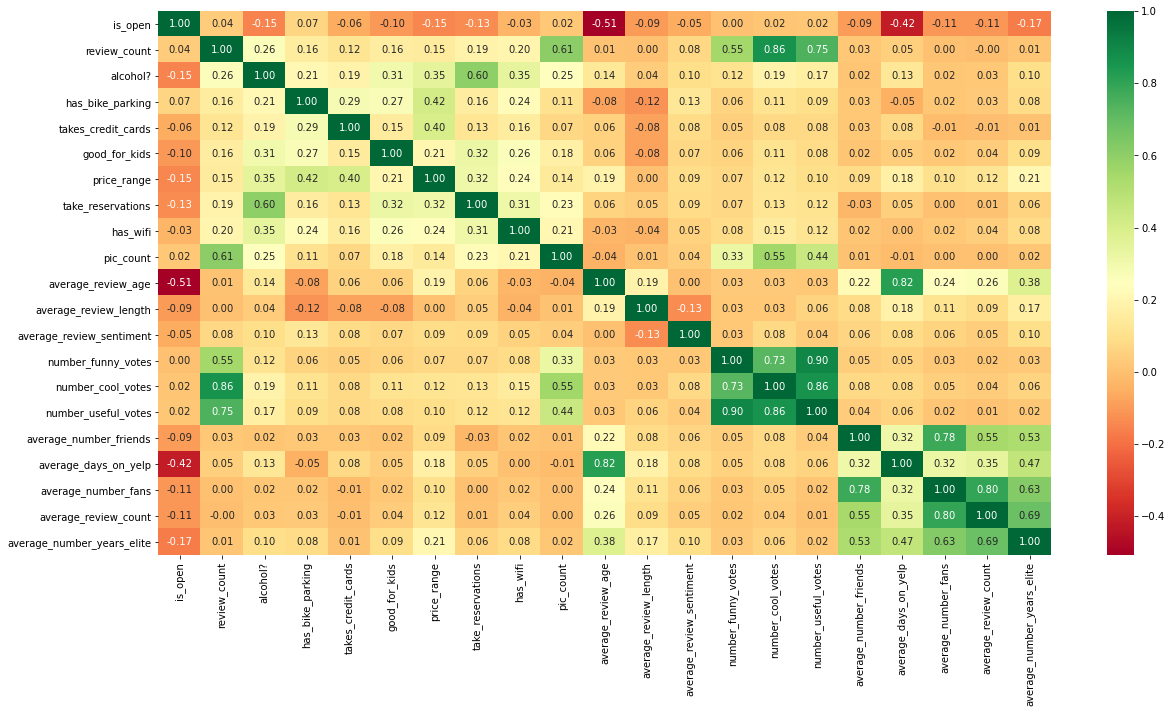

In [42]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='RdYlGn')

In [37]:
# seperate star feature to y for ml
y = data.stars

In [38]:
data.drop(["stars"], axis=1, inplace=True)

In [39]:
X = data

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state = 4040)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150874, 21), (37719, 21), (150874,), (37719,))

In [43]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(X_train,y_train)

LinearRegression()

In [53]:
print("Train score:")
print(model1.score(X_train, y_train))

print("Test score:")
print(model1.score(X_test, y_test))

print("model Coef")
# print(sorted(list(zip(X.columns,model1.coef_)),key = lambda x: abs(x[1]),reverse=True))
# print(model1.coef_)
for i in range(len(X.columns)):
    print(X.columns[i],"{:.3f}".format(model1.coef_[i]))

Train score:
0.6802492882979729
Test score:
0.6791956379260415
model Coef
is_open 0.070
review_count -0.000
alcohol? -0.154
has_bike_parking 0.016
takes_credit_cards 0.020
good_for_kids -0.123
price_range -0.064
take_reservations 0.023
has_wifi -0.121
pic_count -0.001
average_review_age -0.000
average_review_length -0.001
average_review_sentiment 2.291
number_funny_votes 0.000
number_cool_votes 0.001
number_useful_votes -0.000
average_number_friends 0.000
average_days_on_yelp 0.000
average_number_fans 0.001
average_review_count -0.000
average_number_years_elite -0.065


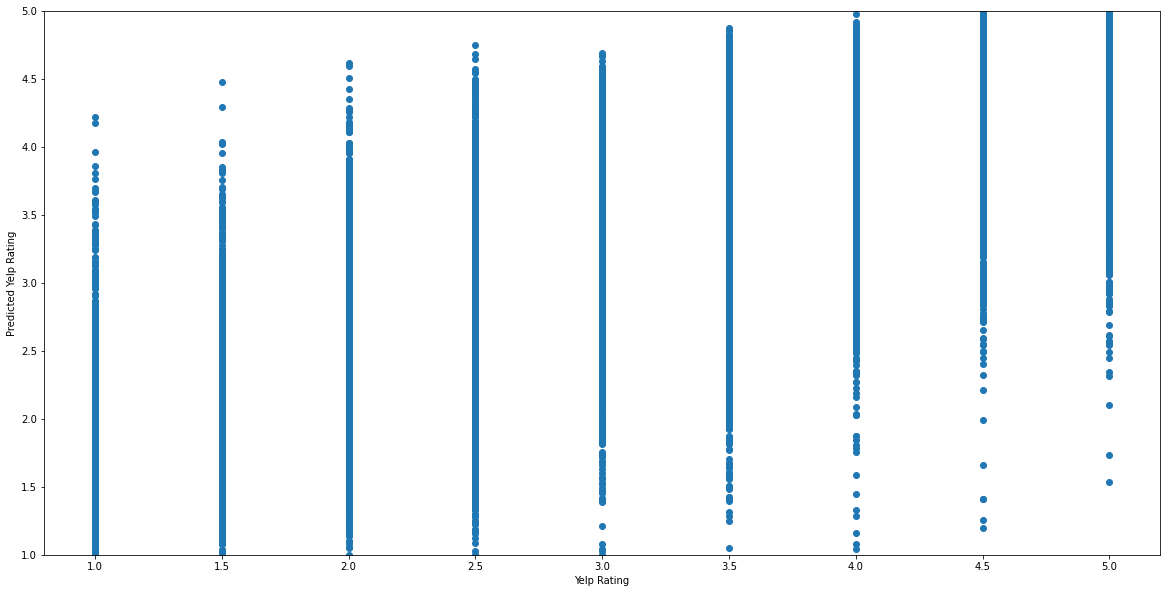

In [52]:
y_predicted= model1.predict(X_test)
plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()